In [33]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
## VERI SETI HIKAYESI VE PROBLEM: SEKER HASTALIGI TAHMINI
## SEKER HASTALIGI TAHMIN MODELI GELISTIRME
df = pd.read_csv("C:/Users/Projeler/Siniflandirma/diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## Lojistik Regresyon model&tahmin
## OUTCOME TAHMINI (DIABET OLUP OLMADIGI, 1 OLABILIR, 0 OLAMAZ)
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
## BETIMSEL ISTATISTIKLERI
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
## BAGIMLI DEGISKENI KAYDETME
## OUTCOME DISINDAKILERI X OLARAK KAYDETME

y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
rf_model = RandomForestClassifier().fit(X_train, y_train) 

## onemli olan kat tane agac fit edilmesi gerektigine karar vermek
## bolunmelerde bulunan degisken sayisi onemli

In [11]:
rf_model

RandomForestClassifier()

In [13]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [14]:
## MODEL TUNING


rf = RandomForestClassifier()

In [23]:
rf_params = {"n_estimators":  [100,200,500,1000] , 
             "max_features": [3,5,7,8] , 
             "min_samples_split": [2,5,10,20]}  ## min samples split dallanmaya kontrol eder 

In [24]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs= -1,verbose= 2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [26]:
rf_cv_model

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 7, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [27]:
rf_cv_model.best_params_ 

{'max_features': 8, 'min_samples_split': 2, 'n_estimators': 200}

In [28]:
## final model

rf_tuned = RandomForestClassifier(max_features= 8 ,
                                  min_samples_split = 2 ,
                                  n_estimators=200 ).fit(X_train,y_train)

In [29]:
y_pred = rf_tuned.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred)

0.7272727272727273

In [36]:
rf_tuned.feature_importances_

array([0.05239811, 0.3614905 , 0.07965043, 0.05026349, 0.05253658,
       0.15480446, 0.1160053 , 0.13285115])

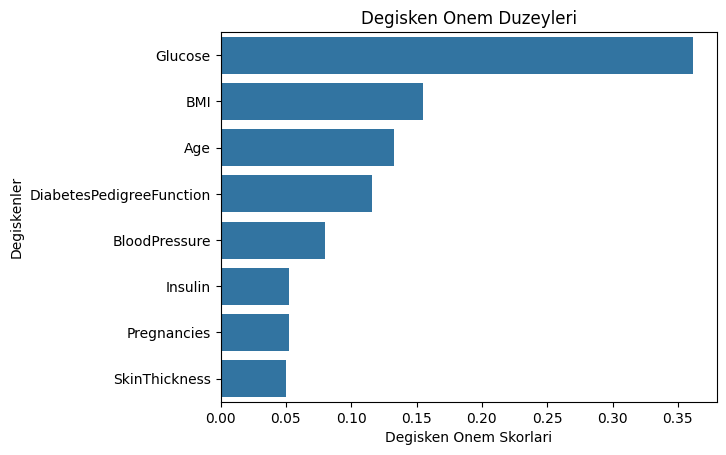

In [34]:
## degisken onem duzeyleri

feature_imp = pd.Series(rf_tuned.feature_importances_, 
                        index=X_train.columns).sort_values(ascending=False)


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Degisken Onem Skorlari')
plt.ylabel('Degiskenler')
plt.title('Degisken Onem Duzeyleri')
plt.show()